In [32]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei']  # 优先微软雅黑/黑体
plt.rcParams['axes.unicode_minus'] = False  # 修复负号显示
data=pd.read_csv(r"D:\MachineLearningTrain\zf\processed_data.csv",sep=',',index_col=0,encoding='utf-8-sig')
data

,RELIEF_MED,ELEV_MED,SQKM,OBJECTID,正样本,POINT_X,POINT_Y,ndvi,宜黄dem,曲率,...,elevation_diff,soil_ACh,soil_ACu,soil_ALh,soil_ATc,landform_LP,landform_SH,landform_SM,landform_TM,shape_index
SLOPE_MED,,,,,,,,,,,,,,,,,,,,,
27.1,240.0,529.0,3339.064421,1,0,116.161667,27.052222,0.790292,553,-9.072000e+09,...,24.0,1,0,0,0,0,1,0,0,57.864406
27.1,240.0,529.0,3339.064421,2,0,116.162500,27.060556,0.791342,501,6.480000e+09,...,-28.0,1,0,0,0,0,1,0,0,57.864406
27.1,240.0,529.0,3339.064421,3,0,116.227222,27.084722,0.770125,431,-1.814400e+10,...,-98.0,1,0,0,0,0,1,0,0,57.864406
27.1,240.0,529.0,3339.064421,4,0,116.173056,27.085000,0.731075,333,-3.888000e+09,...,-196.0,1,0,0,0,0,1,0,0,57.864406
23.5,241.0,604.0,10.425662,5,0,116.167222,27.098056,0.752542,439,1.166400e+10,...,-165.0,0,1,0,0,0,1,0,0,2.322222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.4,32.0,87.0,25.253434,421,1,116.347500,27.660556,0.630142,97,-1.036800e+10,...,10.0,0,0,0,1,1,0,0,0,3.338170
7.7,68.0,120.0,65.988743,422,1,116.350000,27.668333,0.723758,115,9.072000e+09,...,-5.0,1,0,0,0,1,0,0,0,5.487212
12.5,155.0,172.0,207.668235,423,1,116.288056,27.631389,0.762558,133,-1.684800e+10,...,-39.0,1,0,0,0,0,1,0,0,5.460597


In [33]:
data.columns.tolist()

['RELIEF_MED',
 'ELEV_MED',
 'SQKM',
 'OBJECTID',
 '正样本',
 'POINT_X',
 'POINT_Y',
 'ndvi',
 '宜黄dem',
 '曲率',
 '坡向',
 '坡度',
 'yihuangjia',
 'NEAR_FID',
 'geometry',
 'distance_to_water',
 'distance_to_road',
 'rock_IA1',
 'rock_IP4',
 'rock_SC2',
 'rock_SC4',
 'rock_SO1',
 'slope_diff',
 'elevation_diff',
 'soil_ACh',
 'soil_ACu',
 'soil_ALh',
 'soil_ATc',
 'landform_LP',
 'landform_SH',
 'landform_SM',
 'landform_TM',
 'shape_index']

In [34]:
data.drop(columns=['OBJECTID','NEAR_FID','geometry','POINT_X','POINT_Y'], inplace=True,errors='ignore')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 27.1 to 12.5
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RELIEF_MED         424 non-null    float64
 1   ELEV_MED           424 non-null    float64
 2   SQKM               424 non-null    float64
 3   正样本                424 non-null    int64  
 4   ndvi               424 non-null    float64
 5   宜黄dem              424 non-null    int64  
 6   曲率                 424 non-null    float64
 7   坡向                 424 non-null    float64
 8   坡度                 424 non-null    float64
 9   yihuangjia         424 non-null    float64
 10  distance_to_water  424 non-null    float64
 11  distance_to_road   424 non-null    float64
 12  rock_IA1           424 non-null    int64  
 13  rock_IP4           424 non-null    int64  
 14  rock_SC2           424 non-null    int64  
 15  rock_SC4           424 non-null    int64  
 16  rock_SO1           424 non-

解决缺失值被0填补问题（排除独热编码）

In [36]:
import pandas as pd

# 假设df是处理后的数据集，包含所有特征
# 需要排除的独热编码特征列表（示例）
one_hot_features = ['rock_IA1', 'rock_IP4', 'rock_SC2', 'rock_SC4', 'rock_SO1',
                    'soil_ACh', 'soil_ACu', 'soil_ALh', 'soil_ATc',
                    'landform_LP', 'landform_SH', 'landform_SM', 'landform_TM','正样本']

# 筛选非独热编码的数值列
non_one_hot_features = [col for col in data.columns 
                       if col not in one_hot_features 
                       and pd.api.types.is_numeric_dtype(data[col])]
# 统计非独热特征中0的分布
print("非独热特征中0的分布：")
for col in non_one_hot_features:
    total = len(data)
    zero_count = (data[col] == 0).sum()
    zero_percent = (zero_count / total) * 100
    print(f"特征 '{col}' 中0的占比：{zero_percent:.2f}%")

非独热特征中0的分布：
特征 'RELIEF_MED' 中0的占比：0.00%
特征 'ELEV_MED' 中0的占比：0.00%
特征 'SQKM' 中0的占比：0.00%
特征 'ndvi' 中0的占比：0.94%
特征 '宜黄dem' 中0的占比：0.00%
特征 '曲率' 中0的占比：3.54%
特征 '坡向' 中0的占比：1.65%
特征 '坡度' 中0的占比：0.24%
特征 'yihuangjia' 中0的占比：0.71%
特征 'distance_to_water' 中0的占比：0.00%
特征 'distance_to_road' 中0的占比：0.00%
特征 'slope_diff' 中0的占比：0.00%
特征 'elevation_diff' 中0的占比：0.47%
特征 'shape_index' 中0的占比：0.00%


In [37]:
# 计算每个非独热特征的均值（每个特征独立计算）
means = data[non_one_hot_features].mean()

# 用均值填充每个特征的缺失值
data[non_one_hot_features] = data[non_one_hot_features].fillna(means)

print("各特征的均值：")
print(means)
# 计算均值并填充
means = data[non_one_hot_features].mean()
data[non_one_hot_features] = data[non_one_hot_features].fillna(means)

各特征的均值：
RELIEF_MED           2.005778e+02
ELEV_MED             4.190519e+02
SQKM                 1.485371e+03
ndvi                 7.256528e-01
宜黄dem                3.300542e+02
曲率                  -1.027019e+09
坡向                   1.739509e+02
坡度                   1.560210e+01
yihuangjia           1.730384e+03
distance_to_water    7.669473e-02
distance_to_road     2.077125e-02
slope_diff          -5.314645e+00
elevation_diff      -8.899764e+01
shape_index          2.856382e+01
dtype: float64


标准化

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#实例化
data[non_one_hot_features] = scaler.fit_transform(data[non_one_hot_features])

创建新特征

In [39]:
import numpy as np

In [40]:
import numpy as np

# 1. 地形与水文的交互效应 --------------------------------------------------------
# 坡度×降水：捕捉陡坡区域在高降水下的滑坡敏感性
data['slope_rain_interaction'] = data['坡度'] * data['yihuangjia']

# 曲率×高程：地形曲率与高程联合作用（如山顶/山谷稳定性差异）
data['curvature_elevation'] = data['曲率'] * data['宜黄dem']

# 2. 非线性变换 --------------------------------------------------------------
# 坡度的平方：捕捉极端坡度的影响（如 >45° 的区域）
data['slope_squared'] = data['坡度'] ** 2

# 曲率的绝对值：负曲率（山谷）和正曲率（山脊）可能对滑坡贡献不同
data['curvature_abs'] = np.abs(data['曲率'])

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 假设数据已加载到 df 中，目标变量为 'target'

Y = data['正样本'].values         # 目标变量（一维数组）
X = data.drop(columns=['正样本'])  # 特征矩阵

#解决独热编码分组问题

In [42]:
from sklearn.model_selection import train_test_split

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42,stratify=Y  # 添加分层抽样
)

先数据划分->训练集上进行特征选择->将相同特征选择应用到测试集（确保测试集/训练集 特征一致）

In [43]:
#Y=data.iloc[:,data.columns =="正样本"]
#X=data.loc[:, data.columns != "正样本"].copy()  # 创建独立副本

正在检测高相关特征对：
* 高相关对：ELEV_MED vs RELIEF_MED (0.93)
* 高相关对：rock_IA1 vs SQKM (0.90)
* 高相关对：landform_SM vs rock_SO1 (1.00)
* 高相关对：landform_TM vs soil_ALh (1.00)
* 高相关对：shape_index vs SQKM (0.98)

特征删除报告：
原始特征数量：31
检测到高相关特征：9个
实际删除特征：4个
被删除的特征： ['ELEV_MED', 'RELIEF_MED', 'SQKM', 'shape_index']


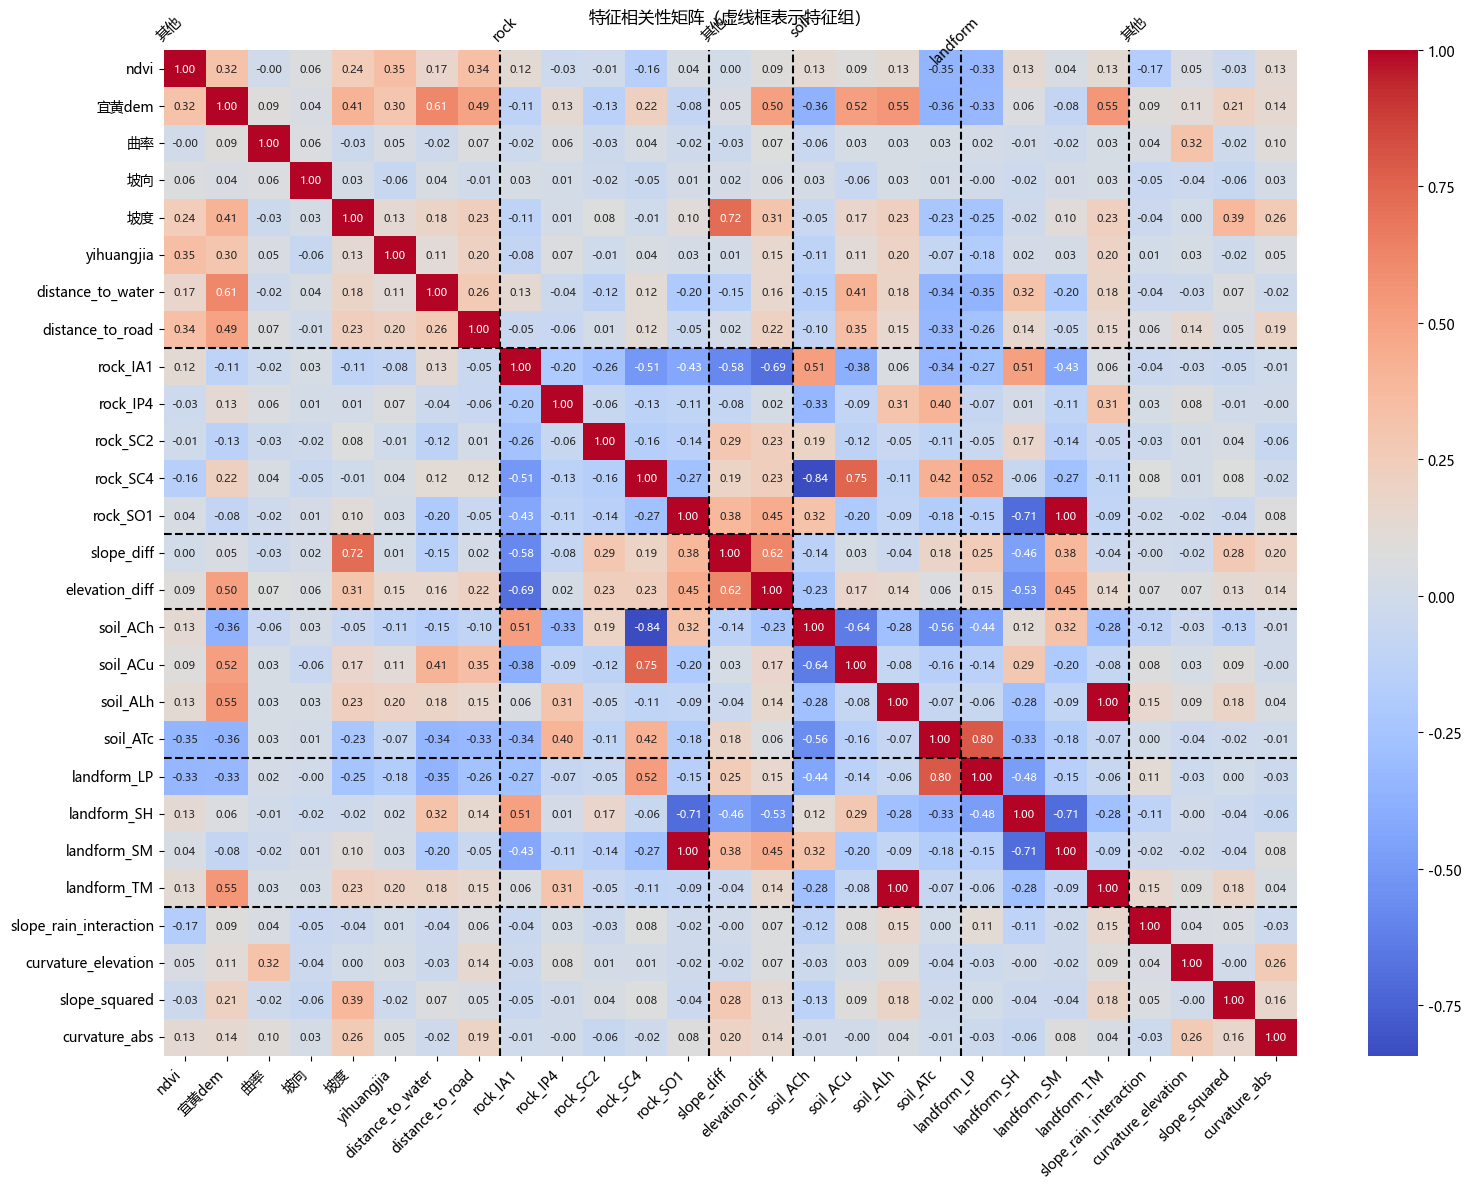

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 定义独热编码特征列表（根据实际数据调整）
one_hot_features = ['rock_IA1', 'rock_IP4', 'rock_SC2', 'rock_SC4', 'rock_SO1',
                    'soil_ACh', 'soil_ACu', 'soil_ALh', 'soil_ATc',
                    'landform_LP', 'landform_SH', 'landform_SM', 'landform_TM']


# 特征预处理 ----------------------------------------------------------
# 2. 创建特征分组映射（增强健壮性） 创建独热编码特征组映射字典
feature_to_group = {}
for feature in one_hot_features:
    if feature in X_train.columns:
        # 支持多种命名方式（如soil-type_ACu）
        group = feature.split('_')[0].split('-')[0]  
        feature_to_group[feature] = group

# 3. 在训练集上计算相关系数矩阵
corr_matrix = X_train.corr()
# 设置相关性阈值
base_threshold = 0.75  # 普通特征阈值
oh_threshold = 0.9    # 涉及独热编码特征的阈值

# 4. 高相关性检测（带动态阈值和日志）   改进的高相关性检测逻辑（跳过同组独热编码特征）
high_corr_pairs = []
high_corr_features = set()

print("正在检测高相关特征对：")
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        col_i = corr_matrix.columns[i]
        col_j = corr_matrix.columns[j]
        
        # 跳过同组独热编码特征
        group_i = feature_to_group.get(col_i, None)
        group_j = feature_to_group.get(col_j, None)
        if group_i and group_j and group_i == group_j:
            continue
        
        # 动态阈值设置
        is_oh_pair = (col_i in one_hot_features) or (col_j in one_hot_features)
        current_threshold = oh_threshold if is_oh_pair else base_threshold
        
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > current_threshold:
            high_corr_features.update([col_i, col_j])
            high_corr_pairs.append( (col_i, col_j, corr_value) )
            print(f"* 高相关对：{col_i} vs {col_j} ({corr_value:.2f})")

# 5. 智能特征删除策略 ------------------------------------------------
# 分类特征类型
oh_candidates = [col for col in high_corr_features if col in one_hot_features]
regular_candidates = [col for col in high_corr_features if col not in one_hot_features]

# 计算需要删除的数量
n_remove = len(high_corr_features) // 2

# 优先删除普通特征
if len(regular_candidates) >= n_remove:
    # 按相关性总得分排序
    regular_scores = {k: corr_matrix[k].abs().sum() for k in regular_candidates}
    to_remove = sorted(regular_scores, key=lambda x: regular_scores[x], reverse=True)[:n_remove]
else:
    # 补充删除独热编码特征
    n_need = n_remove - len(regular_candidates)
    oh_scores = {k: corr_matrix[k].abs().sum() for k in oh_candidates}
    to_remove = regular_candidates + sorted(oh_scores, key=lambda x: oh_scores[x], reverse=True)[:n_need]

# 执行删除
X_train_filtered = X_train.drop(columns=to_remove)
X_test_filtered = X_test.drop(columns=to_remove)

# 6. 验证过滤结果 ------------------------------------------------------------
print(f"\n特征删除报告：")
print(f"原始特征数量：{len(X_train.columns)}")
print(f"检测到高相关特征：{len(high_corr_features)}个")
print(f"实际删除特征：{len(to_remove)}个")
print("被删除的特征：", to_remove)

# 7. 可视化改进 （添加特征分组标识）----------------------------------------------------------
plt.figure(figsize=(16, 12))
ax = sns.heatmap(X_train_filtered.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":8})

# 添加分组边界线（增强可视化）
current_group = None
for idx, col in enumerate(X_train_filtered.columns):
    group = feature_to_group.get(col, '其他')
    if group != current_group:
        if current_group is not None:
            ax.axhline(idx, color='black', lw=1.5, linestyle='--')
            ax.axvline(idx, color='black', lw=1.5, linestyle='--')
        current_group = group
        ax.text(idx+0.5, -1, group, rotation=45, ha='right', va='top', fontsize=10)
        
plt.title("特征相关性矩阵（虚线框表示特征组）", pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('特征相关性矩阵.png', dpi=300)
plt.show()


可选:VIF检验

特征重要性

In [45]:
X_train_filtered.columns

Index(['ndvi', '宜黄dem', '曲率', '坡向', '坡度', 'yihuangjia', 'distance_to_water',
       'distance_to_road', 'rock_IA1', 'rock_IP4', 'rock_SC2', 'rock_SC4',
       'rock_SO1', 'slope_diff', 'elevation_diff', 'soil_ACh', 'soil_ACu',
       'soil_ALh', 'soil_ATc', 'landform_LP', 'landform_SH', 'landform_SM',
       'landform_TM', 'slope_rain_interaction', 'curvature_elevation',
       'slope_squared', 'curvature_abs'],
      dtype='object')

In [46]:
# 定义所有特征组（包含独热编码组和其他独立特征）
feature_groups = {
    'Rock': ['rock_IA1', 'rock_IP4', 'rock_SC2', 'rock_SC4', 'rock_SO1'],
    'Soil': ['soil_ACh', 'soil_ACu', 'soil_ALh', 'soil_ATc'],
    'Landform': ['landform_LP', 'landform_SH', 'landform_SM', 'landform_TM'],
    '曲率': ['曲率'], # 曲率
    '坡向':['坡向'],
    'curvature_abs': ['curvature_abs'],
    '坡度': ['坡度'], # 坡度
    'slope_diff': [ 'slope_diff'],
    'slope_squared': [ 'slope_squared'],
    'elevation_diff': [ 'elevation_diff'],    # 高程相关
    'dem': ['宜黄dem'], 
    'distance_to_water': ['distance_to_water'],
    'distance_to_road': ['distance_to_road'],
    'ndvi': ['ndvi'],
    'jiangshui': ['yihuangjia'],  
    'slope_rain_interaction': ['slope_rain_interaction'],
    'curvature_elevation': ['curvature_elevation'],
}

# 验证分组完整性（确保所有特征都被包含）
all_group_features = [f for group in feature_groups.values() for f in group]
missing = set(X_train_filtered.columns) - set(all_group_features)
assert len(missing) == 0, f"未分组特征：{missing}"

保留特征组：['Rock', 'Soil', 'Landform', '曲率', '坡向', 'curvature_abs', '坡度', 'slope_diff', 'slope_squared', 'elevation_diff', 'dem', 'distance_to_water', 'distance_to_road', 'ndvi', 'jiangshui', 'slope_rain_interaction', 'curvature_elevation']

保留的重要特征数：7
重要特征列表： ['curvature_abs', 'elevation_diff', '宜黄dem', 'distance_to_water', 'distance_to_road', 'ndvi', 'yihuangjia']


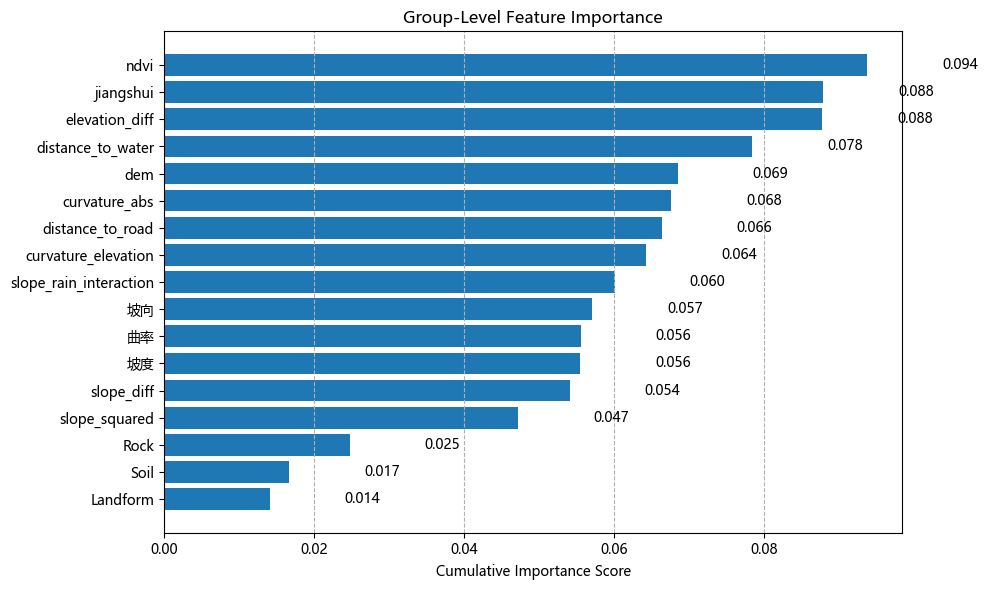

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

def group_based_selection(X_train_filtered, y_train, groups, importance_threshold=0.01):
    """
    组级别特征筛选
    :param importance_threshold: 组重要性阈值（保留总贡献>该值的组）
    """
    # 训练模型获取原始特征重要性
    rf = RandomForestClassifier(n_estimators=300, random_state=42)
    rf.fit(X_train_filtered, y_train)
    
    # 计算每个组的总重要性
    group_scores = {}
    for group_name, features in groups.items():
        valid_features = [f for f in features if f in X_train_filtered.columns]
        if valid_features:
            group_scores[group_name] = sum(rf.feature_importances_[X_train_filtered.columns.get_indexer(valid_features)])
    
    # 筛选重要性达标的组
    selected_groups = [k for k, v in group_scores.items() if v > importance_threshold]
    
    # 合并选中组的所有特征
    selected_features = []
    for group in selected_groups:
        selected_features += groups[group]
    
    return selected_features, group_scores

# 执行筛选
selected_features, group_scores = group_based_selection(
    X_train_filtered, 
    y_train,
    feature_groups,
    importance_threshold=0.065  # 可调整阈值
)

# 应用筛选结果
X_train_group = X_train_filtered[selected_features]
X_test_group = X_test_filtered[selected_features]
print(f"保留特征组：{list(group_scores.keys())}")
print(f"\n保留的重要特征数：{len(selected_features)}")
print("重要特征列表：", selected_features)

import matplotlib.pyplot as plt
# 转换为DataFrame
group_importance = pd.DataFrame({
    'Group': group_scores.keys(),
    'Importance': group_scores.values()
}).sort_values('Importance', ascending=True)

# 绘制水平条形图
plt.figure(figsize=(10, 6))
plt.barh(group_importance['Group'], group_importance['Importance'], color='#1f77b4')
plt.title('Group-Level Feature Importance')
plt.xlabel('Cumulative Importance Score')
plt.grid(axis='x', linestyle='--')

# 标注重要性值
for index, value in enumerate(group_importance['Importance']):
    plt.text(value + 0.01, index, f'{value:.3f}', va='center')

plt.tight_layout()
plt.savefig('FeatureImportance.png', dpi=300)
plt.show()

随机森林，逻辑回归，支持向量机SVM

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# 全局配置
RANDOM_STATE = 42
CV_FOLDS = 5
SCORING = 'roc_auc'
PLOT_SIZE = (10, 8)

# 确保使用处理后的数据
# X_train_filtered, X_test_filtered, y_train, y_test 应已定义

#网格搜索寻找最佳参数（防止过拟合）

In [49]:
model_configs = [
    {
        'name': 'SVM',
        'model': SVC(probability=True, class_weight='balanced',random_state=RANDOM_STATE),
        'params': {
            'C': [0.1, 1, 10, 100,500],          # 控制正则化强度
            'gamma': [0.0001, 0.001, 0.01, 'scale'],  # 核函数带宽
            'kernel': ['rbf', 'linear','poly']    # 核函数类型
    
        }
    },
    {
        'name': 'RandomForest',
        'model': RandomForestClassifier(random_state=RANDOM_STATE,class_weight='balanced_subsample'),
        'params': {
            'n_estimators': [200, 300],    # 树的数量
            'max_depth': [5, 7, 9],      # 树的最大深度
            'min_samples_split': [2, 5],     # 节点分裂最小样本数
            'min_samples_leaf': [3, 5],
            'max_features': ['sqrt', 0.5]
        }
    },
    {
        'name': 'LogisticRegression',
        'model': LogisticRegression(random_state=RANDOM_STATE, solver='liblinear'),
        'params': {
            'C': np.logspace(-3, 3, 7),      # 正则化强度的倒数
            'penalty': ['l1', 'l2'],         # 正则化类型
            'class_weight': ['balanced', None]  # 适用于L1/L2的求解器
        }
    }
]




自动化调优评估


===== 正在优化 SVM =====
Fitting 5 folds for each of 60 candidates, totalling 300 fits
最佳参数：{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
测试集AUC：0.7069

===== 正在优化 RandomForest =====
Fitting 5 folds for each of 48 candidates, totalling 240 fits
最佳参数：{'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
测试集AUC：0.7402

===== 正在优化 LogisticRegression =====
Fitting 5 folds for each of 28 candidates, totalling 140 fits
最佳参数：{'C': 100.0, 'class_weight': 'balanced', 'penalty': 'l1'}
测试集AUC：0.6243


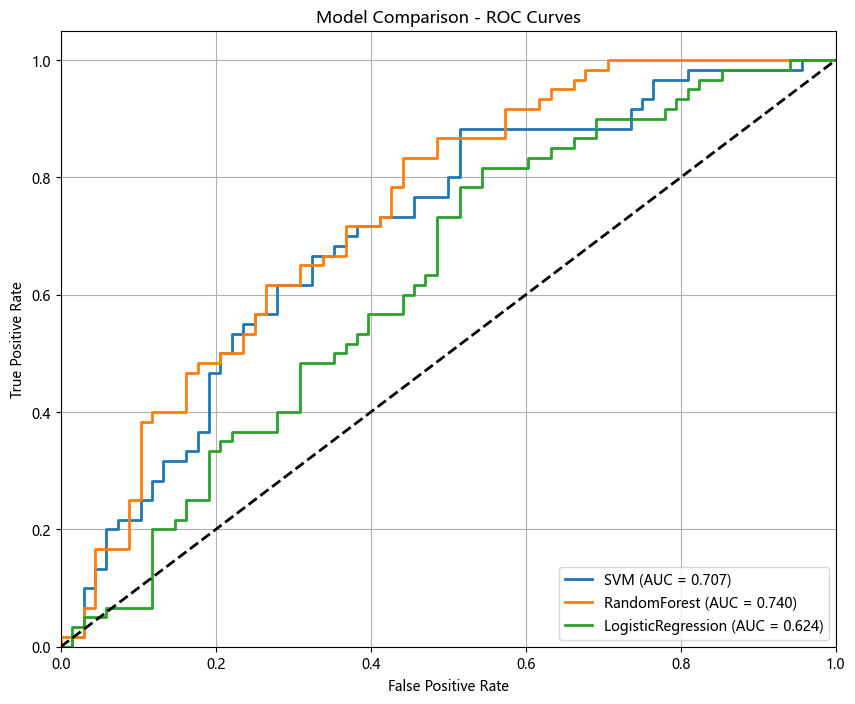

In [50]:
def model_comparison_pipeline(models_config):
    results = {}
    plt.figure(figsize=PLOT_SIZE)
    
    for config in models_config:
        print(f"\n===== 正在优化 {config['name']} =====")
        
        # 网格搜索与交叉验证
        grid = GridSearchCV(
            estimator=config['model'],
            param_grid=config['params'],
            cv=StratifiedKFold(CV_FOLDS),
            scoring=SCORING,
            n_jobs=-1,
            verbose=1
        )
        grid.fit(X_train_group, y_train)
        
        # 获取最佳模型
        best_model = grid.best_estimator_
        
        # 预测概率
        if hasattr(best_model, 'predict_proba'):
            test_proba = best_model.predict_proba(X_test_group)[:, 1]
        else:  # 兼容SVC的probability=False情况
            test_proba = best_model.decision_function(X_test_group)
        
        # 计算指标
        test_roc_auc = roc_auc_score(y_test, test_proba)
        fpr, tpr, _ = roc_curve(y_test, test_proba)
        
        # 存储结果
        results[config['name']] = {
            'model': best_model,
            'params': grid.best_params_,
            'auc': test_roc_auc,
            'fpr': fpr,
            'tpr': tpr
        }
        
        # 绘制ROC曲线
        plt.plot(fpr, tpr, lw=2,
                 label=f"{config['name']} (AUC = {test_roc_auc:.3f})")
        
        # 打印最佳参数
        print(f"最佳参数：{grid.best_params_}")
        print(f"测试集AUC：{test_roc_auc:.4f}")
    
    # 可视化设置
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Model Comparison - ROC Curves')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.savefig('ROC.png', dpi=300)
    plt.show()
    
    return results

# 执行比较
comparison_results = model_comparison_pipeline(model_configs)

In [51]:
def select_best_model(results):
    # 按AUC排序
    sorted_models = sorted(results.items(), key=lambda x: x[1]['auc'], reverse=True)
    
    print("\n模型性能排名：")
    for rank, (name, data) in enumerate(sorted_models, 1):
        print(f"{rank}. {name}: AUC = {data['auc']:.4f}")
    
    # 返回最佳模型
    best_name, best_data = sorted_models[0]
    print(f"\n最佳模型：{best_name} (AUC = {best_data['auc']:.4f})")
    return best_data['model']

best_model = select_best_model(comparison_results)


模型性能排名：
1. RandomForest: AUC = 0.7402
2. SVM: AUC = 0.7069
3. LogisticRegression: AUC = 0.6243

最佳模型：RandomForest (AUC = 0.7402)


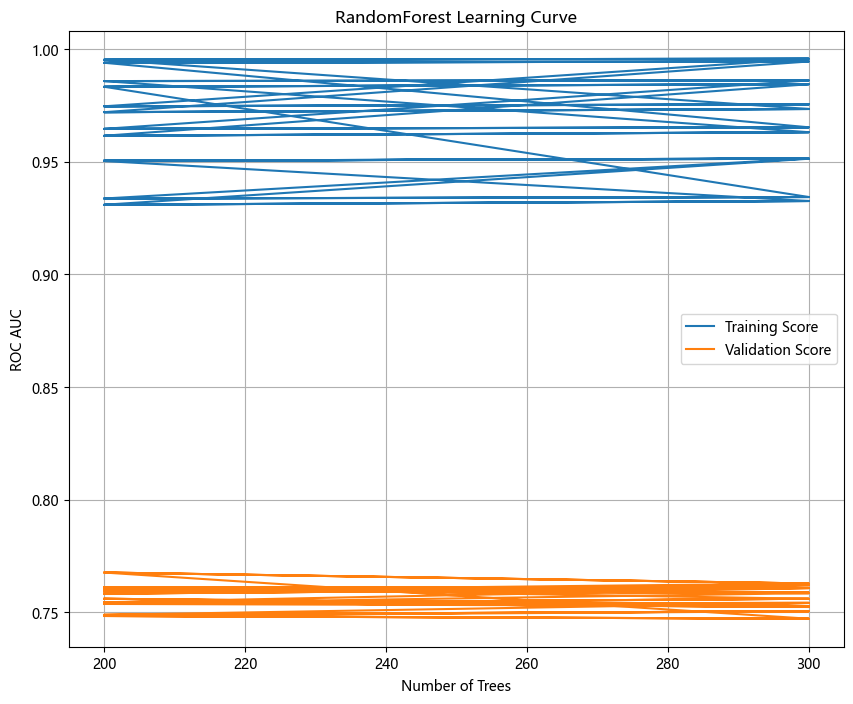

In [52]:
# 训练曲线可视化（以随机森林为例）
rf_grid = GridSearchCV(
    model_configs[1]['model'],
    model_configs[1]['params'],
    cv=StratifiedKFold(CV_FOLDS),
    scoring=SCORING,
    n_jobs=-1,
    return_train_score=True
)
rf_grid.fit(X_train_group, y_train)

# 提取不同n_estimators的表现（示例参数）
results = pd.DataFrame(rf_grid.cv_results_)
n_estimators_results = results[results['param_n_estimators'].notna()]

plt.figure(figsize=PLOT_SIZE)
plt.plot(n_estimators_results['param_n_estimators'], 
         n_estimators_results['mean_train_score'], 
         label='Training Score')
plt.plot(n_estimators_results['param_n_estimators'],
         n_estimators_results['mean_test_score'],
         label='Validation Score')
plt.xlabel('Number of Trees')
plt.ylabel('ROC AUC')
plt.title('RandomForest Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

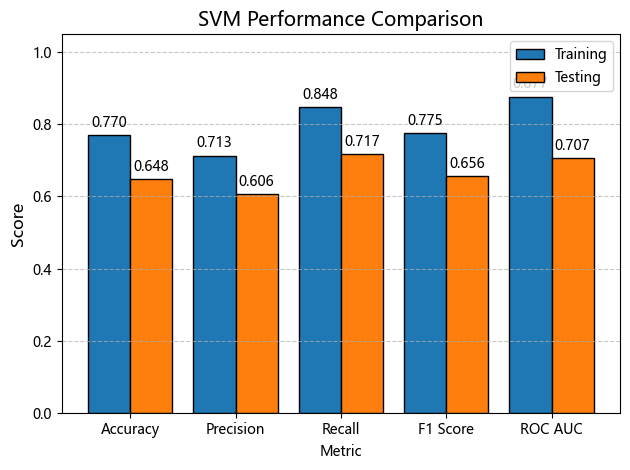

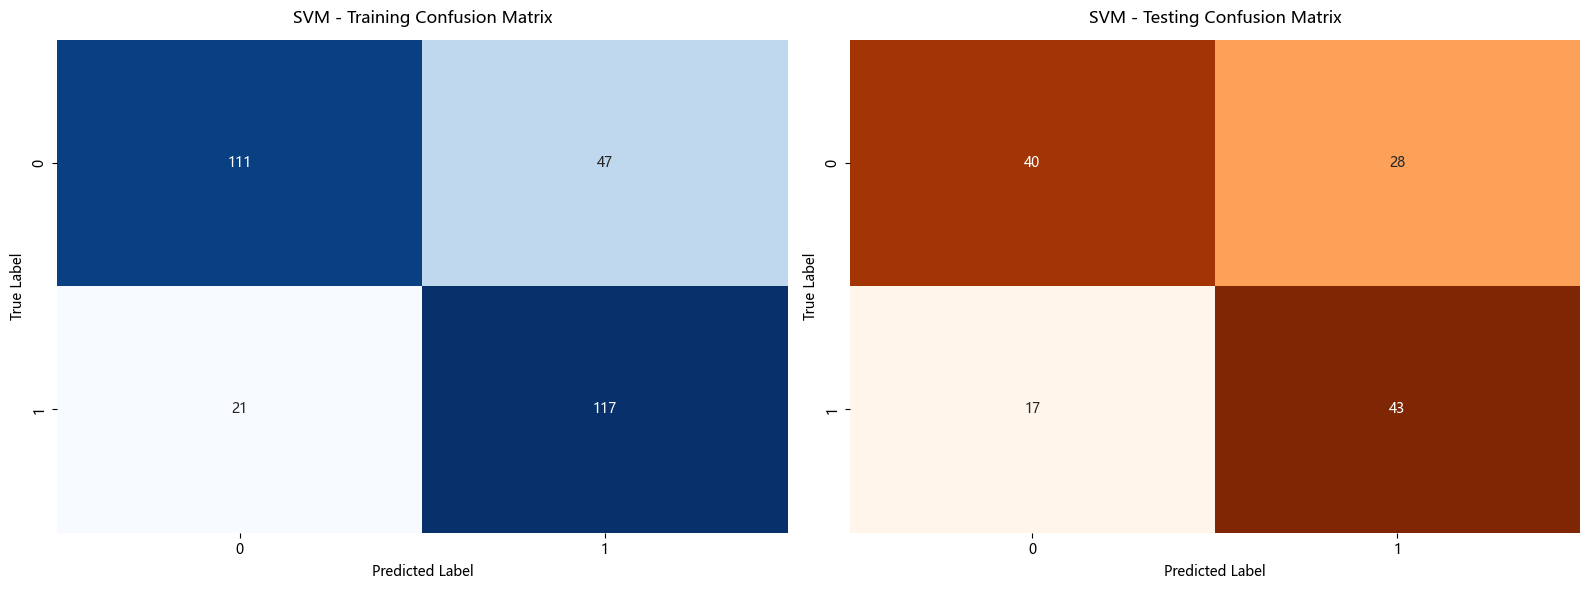

<Figure size 1000x600 with 0 Axes>

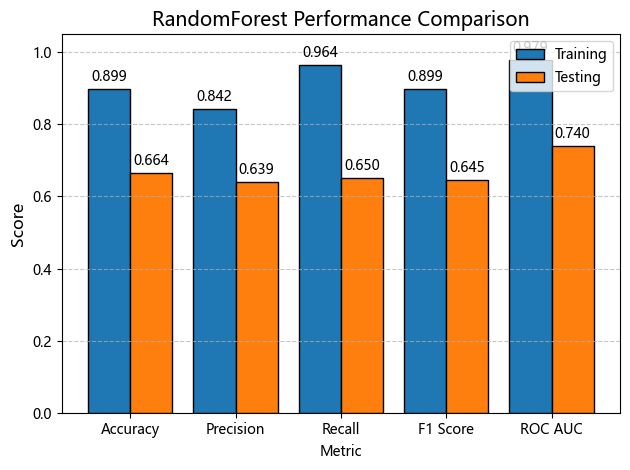

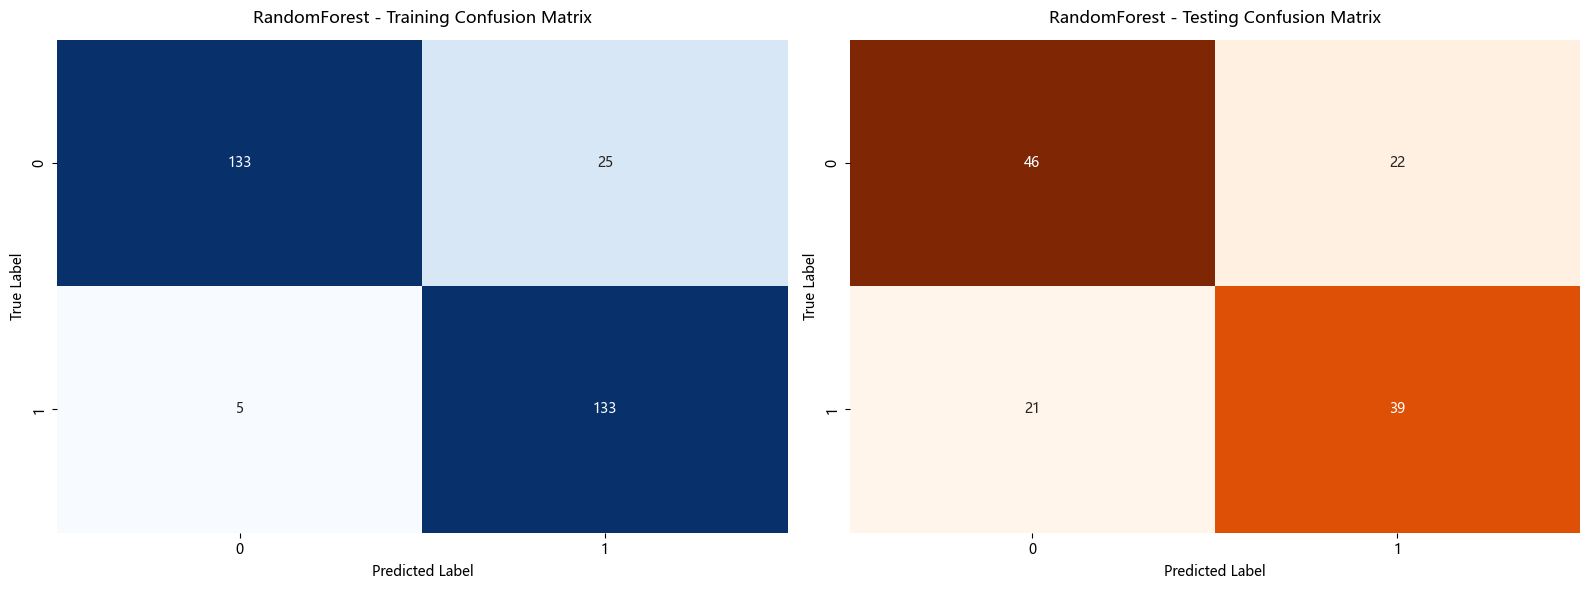

<Figure size 1000x600 with 0 Axes>

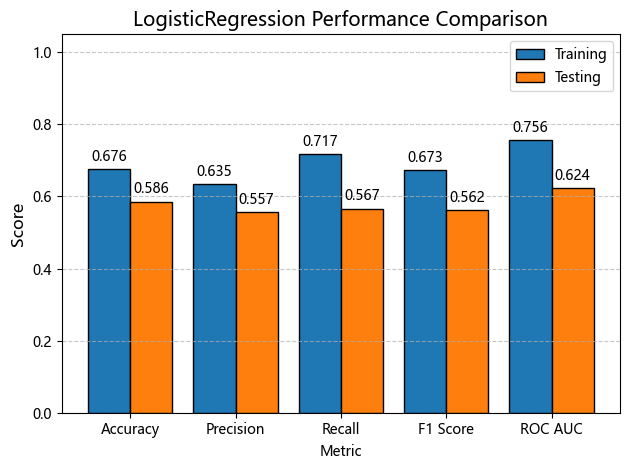

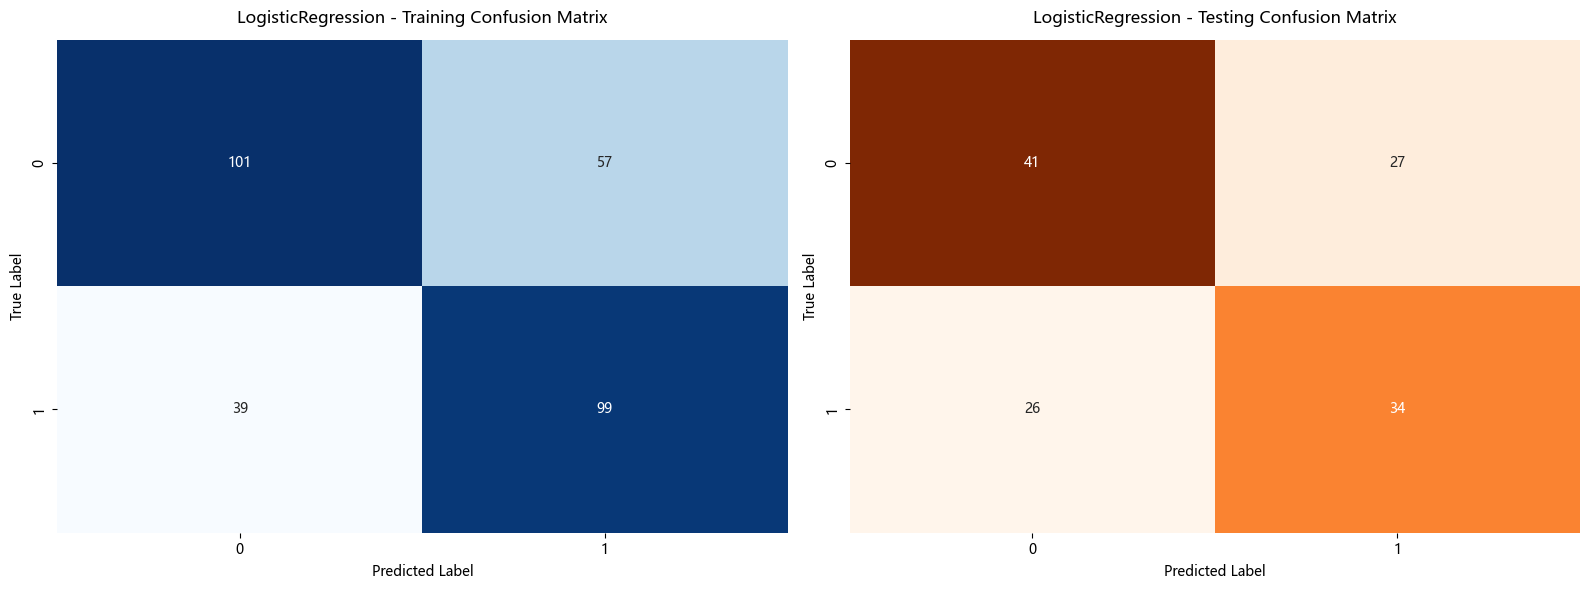

<Figure size 1400x900 with 0 Axes>

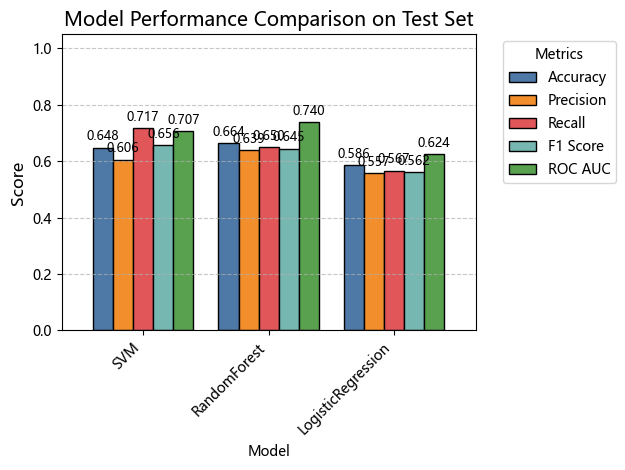

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 创建评估报告存储结构
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
full_report = {'Train': {}, 'Test': {}}

# 为每个模型生成评估报告
for model_name, result in comparison_results.items():
    # 获取最佳模型
    best_model = result['model']
    
    # 预测训练集
    y_train_pred = best_model.predict(X_train_group)
    y_train_proba = best_model.predict_proba(X_train_group)[:, 1] if hasattr(best_model, 'predict_proba') else best_model.decision_function(X_train_group)
    
    # 预测测试集
    y_test_pred = best_model.predict(X_test_group)
    y_test_proba = best_model.predict_proba(X_test_group)[:, 1] if hasattr(best_model, 'predict_proba') else best_model.decision_function(X_test_group)
    
    # 计算指标
    train_metrics = [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred),
        recall_score(y_train, y_train_pred),
        f1_score(y_train, y_train_pred),
        roc_auc_score(y_train, y_train_proba)
    ]
    
    test_metrics = [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred),
        roc_auc_score(y_test, y_test_proba)
    ]
    
    # 存储结果
    full_report['Train'][model_name] = train_metrics
    full_report['Test'][model_name] = test_metrics
    
    # ================== 模型指标对比图 ==================
    plot_data = pd.DataFrame({
        'Metric': metric_names,
        'Training': train_metrics,
        'Testing': test_metrics
    })
    
    plt.figure(figsize=(10, 6))
    ax = plot_data.plot(x='Metric', kind='bar', color=['#1f77b4', '#ff7f0e'], 
                       edgecolor='black', rot=0, width=0.8)
    plt.title(f'{model_name} Performance Comparison', fontsize=14)
    plt.ylabel('Score', fontsize=12)
    plt.ylim(0, 1.05)
    plt.legend(loc='upper right', frameon=True)
    
    # 添加数值标签
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3, fontsize=10)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'{model_name}_metrics_comparison.png', dpi=300)
    plt.show()
    
    # ================== 混淆矩阵 ==================
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # 训练集混淆矩阵
    sns.heatmap(confusion_matrix(y_train, y_train_pred), 
                annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'{model_name} - Training Confusion Matrix', pad=12)
    ax1.set_xlabel('Predicted Label')
    ax1.set_ylabel('True Label')
    
    # 测试集混淆矩阵
    sns.heatmap(confusion_matrix(y_test, y_test_pred), 
                annot=True, fmt='d', cmap='Oranges', cbar=False, ax=ax2)
    ax2.set_title(f'{model_name} - Testing Confusion Matrix', pad=12)
    ax2.set_xlabel('Predicted Label')
    ax2.set_ylabel('True Label')
    
    plt.tight_layout()
    plt.savefig(f'{model_name}_confusion_matrix.png', dpi=300)
    plt.show()

# ================== 综合对比图 ==================
# 准备数据（修正部分）
test_comparison_data = []
for model_name in comparison_results.keys():
    test_metrics = full_report['Test'][model_name]
    test_comparison_data.append({
        'Model': model_name,
        'Accuracy': test_metrics[0],
        'Precision': test_metrics[1],
        'Recall': test_metrics[2],
        'F1 Score': test_metrics[3],
        'ROC AUC': test_metrics[4]
    })

test_comparison = pd.DataFrame(test_comparison_data).set_index('Model')

plt.figure(figsize=(14, 9))
ax = test_comparison.plot(kind='bar', width=0.8, 
                         color=['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f'],
                         edgecolor='black')
plt.title('Model Performance Comparison on Test Set', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# 添加数值标签
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('overall_comparison.png', dpi=300)
plt.show()

可视化（重新关联地理坐标）

In [54]:
#特征数据准备
# 重新加载处理后的完整数据（含所有样本）
full_data = pd.read_csv(r"D:\MachineLearningTrain\zf\processed_data.csv",sep=',',encoding='utf-8-sig')

# 处理缺失值（与训练时相同方式）
import pandas as pd

# 假设df是处理后的数据集，包含所有特征
# 需要排除的独热编码特征列表（示例）
one_hot_features = ['rock_IA1', 'rock_IP4', 'rock_SC2', 'rock_SC4', 'rock_SO1',
                    'soil_ACh', 'soil_ACu', 'soil_ALh', 'soil_ATc',
                    'landform_LP', 'landform_SH', 'landform_SM', 'landform_TM','正样本']

# 筛选非独热编码的数值列
non_one_hot_features = [col for col in full_data.columns 
                       if col not in one_hot_features 
                       and pd.api.types.is_numeric_dtype(full_data[col])]
# 统计非独热特征中0的分布
print("非独热特征中0的分布：")
for col in non_one_hot_features:
    total = len(full_data)
    zero_count = (full_data[col] == 0).sum()
    zero_percent = (zero_count / total) * 100
    print(f"特征 '{col}' 中0的占比：{zero_percent:.2f}%")
# 计算每个非独热特征的均值（每个特征独立计算）
means = full_data[non_one_hot_features].mean()
# 用均值填充每个特征的缺失值
full_data[non_one_hot_features] = full_data[non_one_hot_features].fillna(means)
# 计算均值并填充
means = full_data[non_one_hot_features].mean()
full_data[non_one_hot_features] = full_data[non_one_hot_features].fillna(means)

# 应用与训练时相同的特征筛选
# 假设你之前通过 X_train_group 筛选了特征列，获取这些列名
selected_features = X_train_group.columns.tolist()  # 替换为实际筛选后的特征列表

#由于创建了新特征（确保一致性）
# 1. 地形与水文的交互效应 --------------------------------------------------------
# 坡度×降水：捕捉陡坡区域在高降水下的滑坡敏感性
full_data['slope_rain_interaction'] = full_data['坡度'] * full_data['yihuangjia']

# 曲率×高程：地形曲率与高程联合作用（如山顶/山谷稳定性差异）
full_data['curvature_elevation'] = full_data['曲率'] * full_data['宜黄dem']

# 2. 非线性变换 --------------------------------------------------------------
# 坡度的平方：捕捉极端坡度的影响（如 >45° 的区域）
full_data['slope_squared'] = full_data['坡度'] ** 2

# 曲率的绝对值：负曲率（山谷）和正曲率（山脊）可能对滑坡贡献不同
full_data['curvature_abs'] = np.abs(full_data['曲率'])

# 确保全量数据包含这些特征
X_full = full_data[selected_features].copy()
X_full

非独热特征中0的分布：
特征 'SLOPE_MED' 中0的占比：0.00%
特征 'RELIEF_MED' 中0的占比：0.00%
特征 'ELEV_MED' 中0的占比：0.00%
特征 'SQKM' 中0的占比：0.00%
特征 'OBJECTID' 中0的占比：0.00%
特征 'POINT_X' 中0的占比：0.00%
特征 'POINT_Y' 中0的占比：0.00%
特征 'ndvi' 中0的占比：0.94%
特征 '宜黄dem' 中0的占比：0.00%
特征 '曲率' 中0的占比：3.54%
特征 '坡向' 中0的占比：1.65%
特征 '坡度' 中0的占比：0.24%
特征 'yihuangjia' 中0的占比：0.71%
特征 'NEAR_FID' 中0的占比：0.00%
特征 'distance_to_water' 中0的占比：0.00%
特征 'distance_to_road' 中0的占比：0.00%
特征 'slope_diff' 中0的占比：0.00%
特征 'elevation_diff' 中0的占比：0.47%
特征 'shape_index' 中0的占比：0.00%


,curvature_abs,elevation_diff,宜黄dem,distance_to_water,distance_to_road,ndvi,yihuangjia
0,9.072000e+09,24.0,553,0.258510,0.061480,0.790292,1781.72
1,6.480000e+09,-28.0,501,0.250265,0.053936,0.791342,1768.05
2,1.814400e+10,-98.0,431,0.240671,0.013757,0.770125,1778.67
3,3.888000e+09,-196.0,333,0.227079,0.028091,0.731075,1737.86
4,1.166400e+10,-165.0,439,0.213397,0.024769,0.752542,1786.06
...,...,...,...,...,...,...,...
419,1.036800e+10,10.0,97,0.011623,0.006479,0.630142,1676.95
420,9.072000e+09,-5.0,115,0.016399,0.014170,0.723758,1676.95
421,1.684800e+10,-39.0,133,0.004310,0.008405,0.762558,1690.10
422,0.000000e+00,5.0,177,0.022329,0.021345,0.788492,1705.15


In [55]:
# 标准化（使用训练时的scaler）
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#实例化
X_full_scaled= scaler.fit_transform(X_full)
#X_full_scaled= scaler.transform(X_full)  # scaler应为训练时保存的StandardScaler实例

关联地理坐标

In [56]:
# 重新加载原始几何数据
raw_points = gpd.read_file(r"D:\MachineLearningTrain\zf\Export_Output3.shp", encoding='UTF-8')
# 确保顺序一致（假设全量数据与原始shp顺序一致）
#已确认
# 若没有唯一标识符，直接按顺序匹配
geo_data = raw_points.iloc[:len(full_data)][['geometry']].reset_index(drop=True)

修正栅格生成函数

In [60]:
# ================== 在原环境中保存关键数据 ==================
import joblib
import pandas as pd
import geopandas as gpd

# 1. 确保特征名一致 # 将标准化后的数据转换为DataFrame并保留特征名
X_full_df = pd.DataFrame(X_full_scaled, columns=selected_features)

# 2. 预测概率（无警告）# 使用DataFrame格式预测
full_data['probability'] = best_model.predict_proba(X_full_df)[:, 1]

# 3. 保存特征列名（用于QGIS环境数据对齐）
pd.Series(selected_features).to_csv(r"D:\MachineLearningTrain\selected_features.csv", index=False)

# 4. 保存均值
full_data[non_one_hot_features].mean().to_csv(r"D:\MachineLearningTrain\feature_means.csv")

# 5. 保存标准化器
joblib.dump(scaler, r"D:\MachineLearningTrain\standard_scaler.pkl")

# 6. 保存完整数据（含概率）
full_data.to_csv(r"D:\MachineLearningTrain\full_data_with_prob.csv", index=False)

# 7. 保存几何数据
geo_data.to_file(r"D:\MachineLearningTrain\geo_data_with_prob.shp", encoding='UTF-8')

print("关键数据已保存至 D:\MachineLearningTrain")

关键数据已保存至 D:\MachineLearningTrain


In [61]:
import joblib
# 保存模型
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

到此结束，下面代码作废

In [29]:
import arcpy
# 从ArcGIS获取投影坐标系的范围（单位：米）
dem_path = r"D:\MachineLearningTrain\yihuangdem\hdr.adf"  # 替换为你的DEM路径
dem_desc = arcpy.Describe(dem_path)
bounds = [
    dem_desc.extent.XMin,
    dem_desc.extent.YMin,
    dem_desc.extent.XMax,
    dem_desc.extent.YMax
]
resolution_m = 30  # 30米分辨率

# 计算栅格参数
width = int((bounds[2] - bounds[0]) / resolution_m) + 1
height = int((bounds[3] - bounds[1]) / resolution_m) + 1
transform = from_origin(bounds[0], bounds[3], resolution_m, resolution_m)

# 打印验证
print(f"栅格尺寸: {width}x{height}")
print(f"分辨率: {resolution_m} 米/像素")

ModuleNotFoundError: No module named 'arcpy'

In [27]:
from rasterio.transform import from_origin
import numpy as np
from tqdm import tqdm
import arcpy



def safe_predict_to_raster(model, X, geo_data, output_path, resolution=30):
    """安全版栅格生成函数"""
    # 计算栅格参数
    bounds = [116.021217, 27.038977, 116.482433, 27.717039]
    # 格式：[minx, miny, maxx, maxy]
    #bounds =geo_data.total_bounds#geometries.total_bounds
    resolution=0.001
    width = int((bounds[2] - bounds[0]) / resolution) + 1
    height = int((bounds[3] - bounds[1]) / resolution) + 1
    transform = from_origin(bounds[0], bounds[3], resolution, resolution)
    
    # 预测概率
    proba = model.predict_proba(X)[:, 1]
    # 打印参数验证
print(f"栅格尺寸: {width}x{height}")
print(f"分辨率: {resolution_deg} 度/像素")

# 生成栅格（后续代码保持一致）
    # 初始化栅格
    profile = {
        'driver': 'GTiff',
        'dtype': 'float32',
        'count': 1,
        'width': width,
        'height': height,
        'transform': transform,
        'crs': geometries.crs,
        'nodata': -9999  # 明确设置无效值
    }
    
    with rasterio.open(output_path, 'w', **profile) as dst:
        raster_data = np.full((height, width), -9999, dtype=np.float32)

        
        # 坐标转换并填充
        coords = [(geom.x, geom.y) for geom in geo_data.geometry]
        rows, cols = rasterio.transform.rowcol(transform, [x for x,y in coords], [y for x,y in coords])
        
        valid_count = 0
        for i in tqdm(range(len(rows))):
            if 0 <= rows[i] < height and 0 <= cols[i] < width:
                raster_data[rows[i], cols[i]] = proba[i]
                valid_count += 1
        
        print(f"成功写入 {valid_count}/{len(rows)} 个像素")
        dst.write(raster_data, 1)
print("样本点坐标范围:")
   print("最小X:", min(x for x,y in coords))
   print("最大X:", max(x for x,y in coords))
   print("最小Y:", min(y for x,y in coords))
   print("最大Y:", max(y for x,y in coords))
print("行列号范围:")
   print("最小行:", min(rows), "最大行:", max(rows))
   print("最小列:", min(cols), "最大列:", max(cols))
# 重新生成栅格
safe_predict_to_raster(
    best_model,
    X_full_scaled,
    geo_data.geometry,
    output_path=r"D:\MachineLearningTrain\susceptibility_fixed.tif",
    resolution=30
)

IndentationError: unexpected indent (621921326.py, line 24)

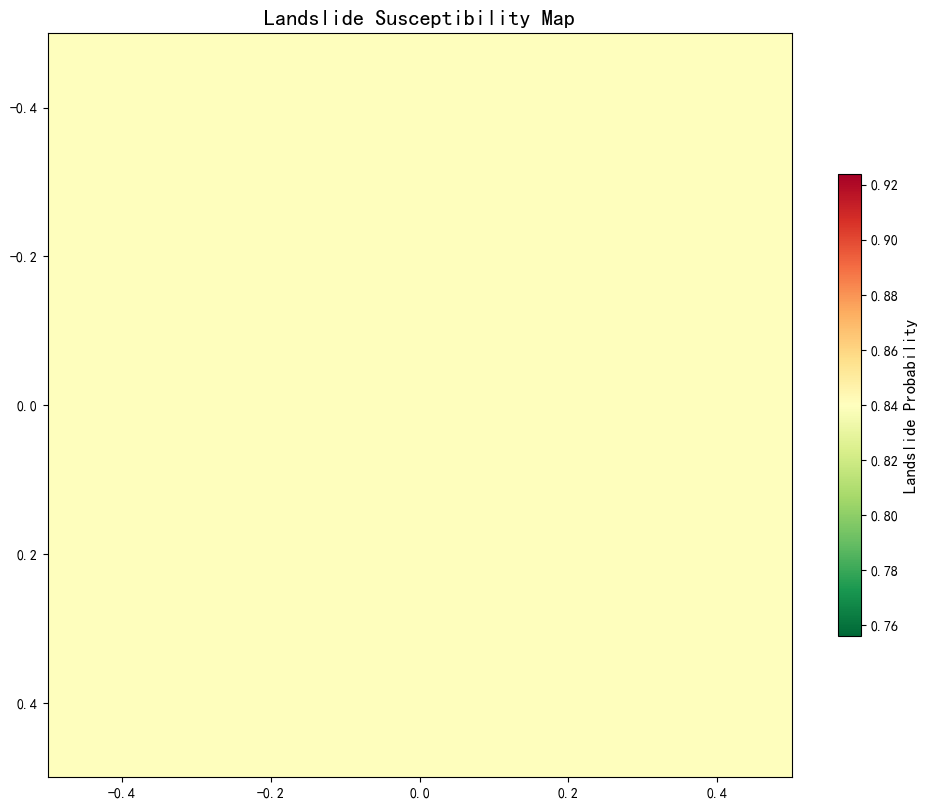

In [91]:
import matplotlib.pyplot as plt
from rasterio.plot import show
import rasterio
def improved_plot(tif_path):
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        data = np.where(data == src.nodata, np.nan, data)
        
        # 动态计算色带范围
        valid_data = data[~np.isnan(data)]
        vmin = np.percentile(valid_data, 5)
        vmax = np.percentile(valid_data, 95)
        
    plt.figure(figsize=(12, 10))
    img = plt.imshow(data, cmap='RdYlGn_r', vmin=vmin, vmax=vmax)
    
    cbar = plt.colorbar(img, shrink=0.6)
    cbar.set_label('Landslide Probability', fontsize=12)
    
    plt.title('Landslide Susceptibility Map', fontsize=16)
    plt.savefig('susceptibility_map_improved.png', dpi=300, bbox_inches='tight')
    plt.show()

improved_plot(r"D:\MachineLearningTrain\susceptibility_fixed.tif")

import rasterio
from concurrent.futures import ThreadPoolExecutor
def predict_to_raster_v2(model, X, geometries, resolution=30, output_path='susceptibility.tif'):
    """全量预测并生成栅格"""
    # 创建基础栅格
    bounds = geometries.total_bounds
    width = int((bounds[2] - bounds[0]) / resolution) + 1
    height = int((bounds[3] - bounds[1]) / resolution) + 1
    
    transform = from_origin(bounds[0], bounds[3], resolution, resolution)
    
    # 预测全量概率
    proba = model.predict_proba(X)[:, 1]
    
    # 初始化栅格
    profile = {
        'driver': 'GTiff',
        'dtype': 'float32',
        'count': 1,
        'width': width,
        'height': height,
        'transform': transform,
        'crs': geometries.crs
        'nodata':'nodata'
    }
    
    with rasterio.open(output_path, 'w', **profile) as dst:
        raster_data = np.full((height, width), np.nan, dtype=np.float32)
        
        # 坐标转换
        coords = [(geom.x, geom.y) for geom in geometries]
        rows, cols = rasterio.transform.rowcol(transform, [x for x,y in coords], [y for x,y in coords])
        
        # 并行填充（加速处理）
        from concurrent.futures import ThreadPoolExecutor
        def fill_pixel(i):
            if 0 <= rows[i] < height and 0 <= cols[i] < width:
                raster_data[rows[i], cols[i]] = proba[i]
                
        with ThreadPoolExecutor() as executor:
            list(tqdm(executor.map(fill_pixel, range(len(rows))), total=len(rows)))
        
        dst.write(raster_data, 1)  import joblib
# 保存模型
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [87]:
from rasterio.transform import from_origin
import numpy as np
from tqdm import tqdm
# 加载最佳模型
best_model = joblib.load('best_model.pkl')  # 替换为实际路径
# 将标准化后的数据转换为 DataFrame 并指定列名
X_full_df = pd.DataFrame(X_full_scaled, columns=selected_features)
# 生成栅格  
# 使用 DataFrame 输入模型
predict_to_raster_v2(
      model=best_model,
      X=X_full_df,  # 替换为 DataFrame
      geometries=geo_data.geometry,
      resolution=30,
      output_path=r"D:\MachineLearningTrain\susceptibility.tif"
)
# 生成栅格
#predict_to_raster_v2(
#    model=best_model,
#    X=X_full_scaled,  # 使用全量标准化数据
#    geometries=geo_data.geometry,
#    resolution=30,  # 与原始DEM分辨率一致
#    output_path=r"D:\MachineLearningTrain\susceptibility.tif"
#)

CPLE_AppDefinedError: Deleting D:\MachineLearningTrain\susceptibility.tif failed: Permission denied

#最终可视化

In [89]:
import rasterio
import numpy as np

with rasterio.open(r"D:\MachineLearningTrain\susceptibility.tif") as src:
    data = src.read(1)
    print("=== 数据统计 ===")
    print("最小值:", np.nanmin(data))
    print("最大值:", np.nanmax(data))
    print("有效像素比例:", f"{np.mean(~np.isnan(data))*100:.2f}%")
    print("行列数:", data.shape)

=== 数据统计 ===
最小值: 0.8398544
最大值: 0.8398544
有效像素比例: 100.00%
行列数: (1, 1)


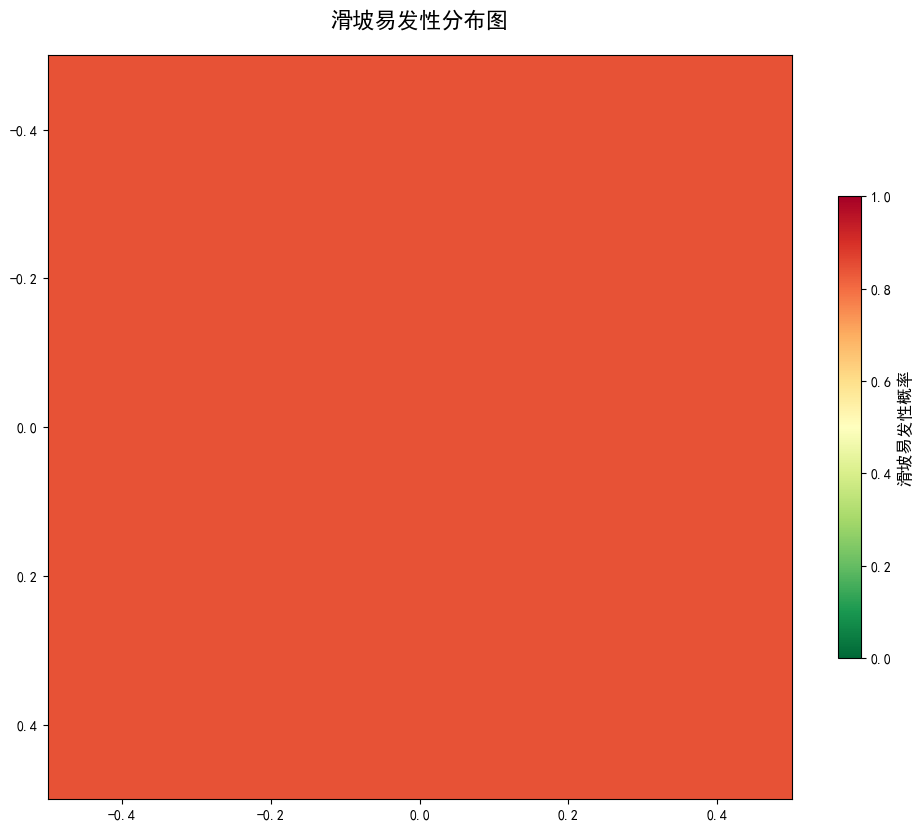

In [76]:
import matplotlib.pyplot as plt
from rasterio.plot import show
import rasterio

plt.rcParams['font.family'] = 'SimHei'  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 修复负号显示

def simple_plot(tif_path, output_png_path='susceptibility_map.png'):
    """简化版可视化（无需scalebar）"""
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        
    plt.figure(figsize=(12, 10))
    img = plt.imshow(data, cmap='RdYlGn_r', vmin=0, vmax=1)
    
    cbar = plt.colorbar(img, shrink=0.6)
    cbar.set_label('滑坡易发性概率', fontsize=12)
    
    plt.title('滑坡易发性分布图', fontsize=16, pad=20)
    plt.savefig(output_png_path, dpi=300, bbox_inches='tight')
    plt.show()

# 执行
simple_plot(
    r"D:\MachineLearningTrain\susceptibility.tif",
    r"D:\MachineLearningTrain\susceptibility_map.png"
)